# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Extracting mnist: 100%|██████████████████████████████████████████████████████████| 60.0K/60.0K [05:44<00:00, 174File/s]


Extracting celeba...


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

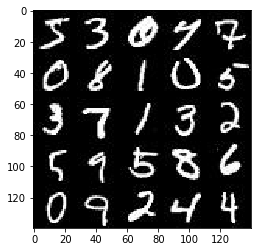

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

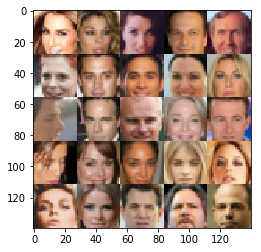

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


C:\Users\josh\Anaconda3\envs\intro\lib\site-packages\ipykernel\__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    # Real input img placeholder
    riiplaceholder = tf.placeholder(tf.float32, 
                          (None, 
                           image_width, 
                           image_height, 
                           image_channels), 
                           name='inputs_real')
    
    # z input placeholder
    ziplacehold = tf.placeholder(tf.float32, 
                                 (None, 
                                  z_dim), 
                                  name='inputs_z')
    
    # Learning Rate placeholder
    lrplaceholder = tf.placeholder(tf.float32, 
                                   name='learning_rate')
    
    return riiplaceholder, ziplacehold, lrplaceholder


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    with tf.variable_scope('discriminator', reuse=reuse):
        alpha=0.2
        dropout = 0.4
        
        x1 = tf.layers.conv2d(images, 
                              64, 
                              5, 
                              strides=2, 
                              padding='same')
        relu1 = tf.maximum(alpha * x1, x1)
        relu1 = tf.layers.dropout(relu1,dropout)
        
        
        x2 = tf.layers.conv2d(relu1, 
                              128, 
                              5, 
                              strides=2, 
                              padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        relu2 = tf.layers.dropout(relu2,dropout)
        
        x3 = tf.layers.conv2d(relu2, 
                              256, 
                              5, 
                              strides=2, 
                              padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        relu3 = tf.layers.dropout(relu3,dropout)
        
        x4 = tf.layers.conv2d(relu3, 
                              512, 
                              5, 
                              strides=1, 
                              padding='same')
        bn4 = tf.layers.batch_normalization(x4, training=True)
        relu4 = tf.maximum(alpha * bn4, bn4)
        relu4 = tf.layers.dropout(relu4,dropout)
        
        # Flatten
        flat = tf.reshape(relu3, (-1, 4*4*512))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
    

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [10]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse= not is_train):
        alpha = 0.2
        dropout=0.4
        
        # First 
        x1 = tf.layers.dense(z, 7*7*256)

        x1 = tf.reshape(x1, (-1, 7, 7, 256))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.layers.dropout(x1,dropout)

        # Secound
        x2 = tf.layers.conv2d_transpose(x1, 
                                        128, 
                                        (5,5), 
                                        strides=2, 
                                        padding='same')
        
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha * x2, x2)

        # Third
        x3 = tf.layers.conv2d_transpose(x2, 
                                        64, 
                                        (5,5), 
                                        strides=2, 
                                        padding='same')
        
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha * x3, x3)

        # Fourth
        x4 = tf.layers.conv2d_transpose(x3, 
                                        32, 
                                        (5,5), 
                                        strides=1, 
                                        padding='same')
        
        x4 = tf.layers.batch_normalization(x4, training=is_train)
        x4 = tf.maximum(alpha * x4, x4)

        
        # Output layer
        logits = tf.layers.conv2d_transpose(x4, 
                                            out_channel_dim, 
                                            (5,5), 
                                            strides=1, 
                                            padding='same')
        #print(logits.shape)
        
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [11]:
import numpy as np
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=d_logits_real, 
            labels=tf.ones_like(d_model_real)*np.random.uniform(0.7, 1.2)))
    
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [12]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    # weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(
            learning_rate, 
            beta1=beta1).minimize(d_loss, var_list=d_vars)
        
        g_train_opt = tf.train.AdamOptimizer(learning_rate, 
                                             beta1=beta1).minimize(g_loss, 
                                                                   var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [13]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [15]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, lr = model_inputs(image_width, 
                                           image_height, 
                                           image_channels, 
                                           z_dim)
    
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    steps = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                steps += 1
                
                batch_images = batch_images * 2
                
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images,
                                               input_z: batch_z,
                                               lr: learning_rate})
                    
                _ = sess.run(g_opt, feed_dict={input_real: batch_images,
                                               input_z: batch_z,
                                               lr: learning_rate})
                
                
                if steps % 10 == 0:
                    # each epoch, print the losses
                    train_loss_d = d_loss.eval({input_z: batch_z,
                                                input_real: batch_images})
                    
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 100 == 0:
                    show_generator_output(sess, 
                                          20, 
                                          input_z, 
                                          image_channels, 
                                          data_image_mode)                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.6227... Generator Loss: 6.8393
Epoch 1/2... Discriminator Loss: 6.5732... Generator Loss: 0.0046
Epoch 1/2... Discriminator Loss: 0.8026... Generator Loss: 2.6691
Epoch 1/2... Discriminator Loss: 1.3650... Generator Loss: 3.0832
Epoch 1/2... Discriminator Loss: 1.6224... Generator Loss: 0.5096
Epoch 1/2... Discriminator Loss: 1.4513... Generator Loss: 1.3882
Epoch 1/2... Discriminator Loss: 1.9660... Generator Loss: 2.6986
Epoch 1/2... Discriminator Loss: 1.2648... Generator Loss: 0.9218
Epoch 1/2... Discriminator Loss: 1.4498... Generator Loss: 0.7624
Epoch 1/2... Discriminator Loss: 1.0874... Generator Loss: 1.3025


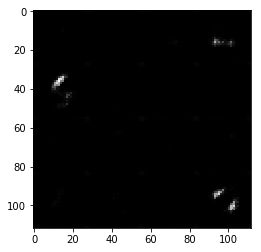

Epoch 1/2... Discriminator Loss: 1.3066... Generator Loss: 1.0285
Epoch 1/2... Discriminator Loss: 1.2554... Generator Loss: 0.8875
Epoch 1/2... Discriminator Loss: 1.2664... Generator Loss: 0.8399
Epoch 1/2... Discriminator Loss: 1.2007... Generator Loss: 1.0884
Epoch 1/2... Discriminator Loss: 1.5659... Generator Loss: 0.7508
Epoch 1/2... Discriminator Loss: 1.4763... Generator Loss: 0.6049
Epoch 1/2... Discriminator Loss: 1.4625... Generator Loss: 0.6991
Epoch 1/2... Discriminator Loss: 1.5632... Generator Loss: 0.5687
Epoch 1/2... Discriminator Loss: 1.3201... Generator Loss: 0.8361
Epoch 1/2... Discriminator Loss: 1.3702... Generator Loss: 1.3024


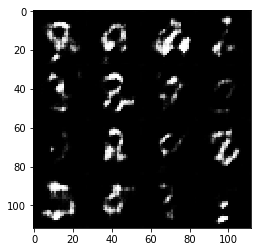

Epoch 1/2... Discriminator Loss: 1.3813... Generator Loss: 0.9999
Epoch 1/2... Discriminator Loss: 1.2876... Generator Loss: 0.9137
Epoch 1/2... Discriminator Loss: 1.3338... Generator Loss: 1.2947
Epoch 1/2... Discriminator Loss: 1.6421... Generator Loss: 1.6463
Epoch 1/2... Discriminator Loss: 1.2313... Generator Loss: 0.9312
Epoch 1/2... Discriminator Loss: 1.4812... Generator Loss: 0.5487
Epoch 1/2... Discriminator Loss: 1.1050... Generator Loss: 1.0791
Epoch 1/2... Discriminator Loss: 1.2658... Generator Loss: 1.1962
Epoch 1/2... Discriminator Loss: 1.3312... Generator Loss: 1.9404
Epoch 1/2... Discriminator Loss: 1.6246... Generator Loss: 0.5548


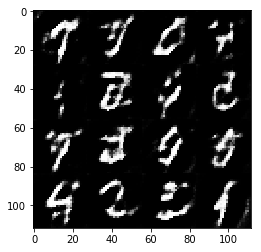

Epoch 1/2... Discriminator Loss: 1.5986... Generator Loss: 0.4983
Epoch 1/2... Discriminator Loss: 1.2608... Generator Loss: 0.8007
Epoch 1/2... Discriminator Loss: 1.2710... Generator Loss: 0.8686
Epoch 1/2... Discriminator Loss: 1.4494... Generator Loss: 0.6945
Epoch 1/2... Discriminator Loss: 1.0932... Generator Loss: 1.6384
Epoch 1/2... Discriminator Loss: 1.3384... Generator Loss: 0.7531
Epoch 1/2... Discriminator Loss: 1.4062... Generator Loss: 0.8396
Epoch 1/2... Discriminator Loss: 1.2736... Generator Loss: 1.1274
Epoch 1/2... Discriminator Loss: 1.2086... Generator Loss: 1.0794
Epoch 1/2... Discriminator Loss: 1.5132... Generator Loss: 1.6314


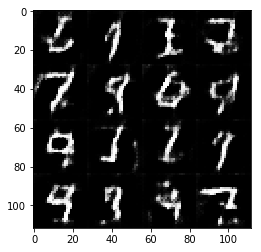

Epoch 1/2... Discriminator Loss: 1.1929... Generator Loss: 1.0248
Epoch 1/2... Discriminator Loss: 1.3075... Generator Loss: 1.0717
Epoch 1/2... Discriminator Loss: 1.6503... Generator Loss: 1.4323
Epoch 1/2... Discriminator Loss: 1.5142... Generator Loss: 0.6004
Epoch 1/2... Discriminator Loss: 1.9940... Generator Loss: 0.3056
Epoch 1/2... Discriminator Loss: 1.2692... Generator Loss: 0.8734
Epoch 1/2... Discriminator Loss: 1.1514... Generator Loss: 1.0448
Epoch 1/2... Discriminator Loss: 1.2745... Generator Loss: 1.2139
Epoch 1/2... Discriminator Loss: 1.5741... Generator Loss: 1.5574
Epoch 1/2... Discriminator Loss: 1.3389... Generator Loss: 1.0058


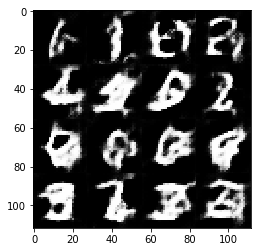

Epoch 1/2... Discriminator Loss: 1.2328... Generator Loss: 0.9082
Epoch 1/2... Discriminator Loss: 1.1813... Generator Loss: 1.3515
Epoch 1/2... Discriminator Loss: 1.3296... Generator Loss: 1.1519
Epoch 1/2... Discriminator Loss: 1.2747... Generator Loss: 0.8135
Epoch 1/2... Discriminator Loss: 1.4185... Generator Loss: 1.8356
Epoch 1/2... Discriminator Loss: 1.2297... Generator Loss: 1.4033
Epoch 1/2... Discriminator Loss: 1.1949... Generator Loss: 1.1238
Epoch 1/2... Discriminator Loss: 1.3001... Generator Loss: 1.5840
Epoch 1/2... Discriminator Loss: 1.2679... Generator Loss: 0.8206
Epoch 1/2... Discriminator Loss: 1.5631... Generator Loss: 2.2576


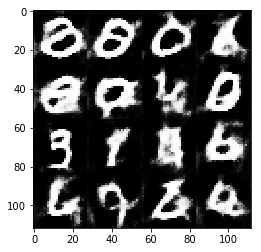

Epoch 1/2... Discriminator Loss: 1.2675... Generator Loss: 1.0439
Epoch 1/2... Discriminator Loss: 1.4431... Generator Loss: 1.6667
Epoch 1/2... Discriminator Loss: 1.4225... Generator Loss: 0.7444
Epoch 1/2... Discriminator Loss: 1.2942... Generator Loss: 1.5626
Epoch 1/2... Discriminator Loss: 1.2383... Generator Loss: 1.4335
Epoch 1/2... Discriminator Loss: 1.5598... Generator Loss: 0.4996
Epoch 1/2... Discriminator Loss: 1.4812... Generator Loss: 0.5641
Epoch 1/2... Discriminator Loss: 1.2516... Generator Loss: 1.1329
Epoch 1/2... Discriminator Loss: 1.1991... Generator Loss: 0.8954
Epoch 1/2... Discriminator Loss: 1.1627... Generator Loss: 1.3447


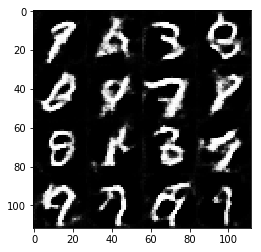

Epoch 1/2... Discriminator Loss: 1.4171... Generator Loss: 1.3073
Epoch 1/2... Discriminator Loss: 1.1596... Generator Loss: 0.9098
Epoch 1/2... Discriminator Loss: 1.5866... Generator Loss: 1.8065
Epoch 1/2... Discriminator Loss: 1.3103... Generator Loss: 1.6892
Epoch 1/2... Discriminator Loss: 1.6567... Generator Loss: 0.4672
Epoch 1/2... Discriminator Loss: 1.4912... Generator Loss: 0.5593
Epoch 1/2... Discriminator Loss: 1.2792... Generator Loss: 1.5285
Epoch 1/2... Discriminator Loss: 1.3097... Generator Loss: 1.0262
Epoch 1/2... Discriminator Loss: 1.2733... Generator Loss: 0.8306
Epoch 1/2... Discriminator Loss: 1.1014... Generator Loss: 1.6660


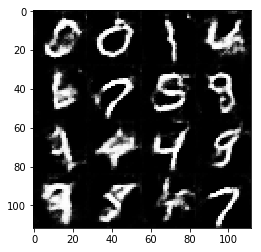

Epoch 1/2... Discriminator Loss: 1.4130... Generator Loss: 0.6906
Epoch 1/2... Discriminator Loss: 1.4332... Generator Loss: 0.6076
Epoch 1/2... Discriminator Loss: 1.4503... Generator Loss: 0.5749
Epoch 1/2... Discriminator Loss: 1.2834... Generator Loss: 0.7994
Epoch 1/2... Discriminator Loss: 1.2004... Generator Loss: 1.0738
Epoch 1/2... Discriminator Loss: 1.2446... Generator Loss: 1.2531
Epoch 1/2... Discriminator Loss: 1.3637... Generator Loss: 0.6682
Epoch 1/2... Discriminator Loss: 1.1610... Generator Loss: 0.9917
Epoch 1/2... Discriminator Loss: 1.0217... Generator Loss: 1.3309
Epoch 1/2... Discriminator Loss: 1.0686... Generator Loss: 1.4929


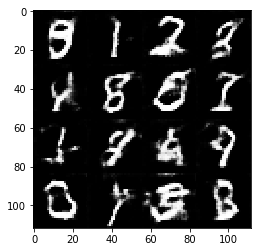

Epoch 1/2... Discriminator Loss: 1.2655... Generator Loss: 0.9796
Epoch 1/2... Discriminator Loss: 1.2644... Generator Loss: 0.8944
Epoch 1/2... Discriminator Loss: 1.1614... Generator Loss: 1.3597
Epoch 1/2... Discriminator Loss: 1.2131... Generator Loss: 1.1554
Epoch 1/2... Discriminator Loss: 1.3462... Generator Loss: 0.6923
Epoch 1/2... Discriminator Loss: 1.5658... Generator Loss: 0.4987
Epoch 1/2... Discriminator Loss: 1.2235... Generator Loss: 0.8405
Epoch 1/2... Discriminator Loss: 1.3654... Generator Loss: 0.6579
Epoch 1/2... Discriminator Loss: 1.0917... Generator Loss: 1.5565
Epoch 1/2... Discriminator Loss: 1.1156... Generator Loss: 1.7726


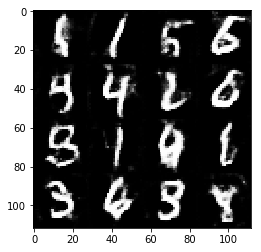

Epoch 1/2... Discriminator Loss: 1.2835... Generator Loss: 1.3283
Epoch 1/2... Discriminator Loss: 1.2368... Generator Loss: 1.4259
Epoch 1/2... Discriminator Loss: 1.2926... Generator Loss: 1.4053
Epoch 1/2... Discriminator Loss: 1.6091... Generator Loss: 2.8965
Epoch 1/2... Discriminator Loss: 1.4649... Generator Loss: 0.7046
Epoch 1/2... Discriminator Loss: 1.1548... Generator Loss: 1.4700
Epoch 1/2... Discriminator Loss: 1.4817... Generator Loss: 2.1700
Epoch 1/2... Discriminator Loss: 1.1776... Generator Loss: 1.3313
Epoch 1/2... Discriminator Loss: 1.5370... Generator Loss: 2.3528
Epoch 1/2... Discriminator Loss: 1.4068... Generator Loss: 0.8247


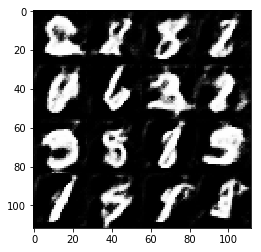

Epoch 1/2... Discriminator Loss: 1.5546... Generator Loss: 2.3328
Epoch 1/2... Discriminator Loss: 1.2550... Generator Loss: 0.9887
Epoch 1/2... Discriminator Loss: 1.3632... Generator Loss: 0.7410
Epoch 1/2... Discriminator Loss: 1.3577... Generator Loss: 0.9623
Epoch 1/2... Discriminator Loss: 1.1617... Generator Loss: 1.0566
Epoch 1/2... Discriminator Loss: 1.1321... Generator Loss: 1.1671
Epoch 1/2... Discriminator Loss: 1.5575... Generator Loss: 2.0820
Epoch 1/2... Discriminator Loss: 1.5213... Generator Loss: 0.5234
Epoch 1/2... Discriminator Loss: 1.2419... Generator Loss: 0.9617
Epoch 1/2... Discriminator Loss: 1.0500... Generator Loss: 1.3307


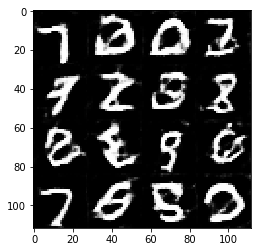

Epoch 2/2... Discriminator Loss: 1.3462... Generator Loss: 1.3460
Epoch 2/2... Discriminator Loss: 1.0861... Generator Loss: 1.0464
Epoch 2/2... Discriminator Loss: 1.3509... Generator Loss: 1.5378
Epoch 2/2... Discriminator Loss: 1.4206... Generator Loss: 0.6783
Epoch 2/2... Discriminator Loss: 1.2182... Generator Loss: 0.9063
Epoch 2/2... Discriminator Loss: 1.1519... Generator Loss: 1.6377
Epoch 2/2... Discriminator Loss: 1.2075... Generator Loss: 1.0503
Epoch 2/2... Discriminator Loss: 1.1534... Generator Loss: 1.0844
Epoch 2/2... Discriminator Loss: 1.0995... Generator Loss: 1.4097
Epoch 2/2... Discriminator Loss: 1.1810... Generator Loss: 0.8488


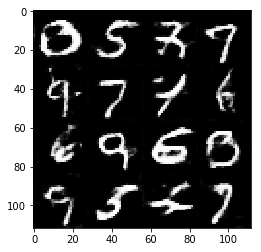

Epoch 2/2... Discriminator Loss: 1.5299... Generator Loss: 1.7194
Epoch 2/2... Discriminator Loss: 1.0594... Generator Loss: 1.3267
Epoch 2/2... Discriminator Loss: 1.6567... Generator Loss: 0.4508
Epoch 2/2... Discriminator Loss: 1.2009... Generator Loss: 0.8731
Epoch 2/2... Discriminator Loss: 1.1066... Generator Loss: 0.9353
Epoch 2/2... Discriminator Loss: 1.2278... Generator Loss: 1.3794
Epoch 2/2... Discriminator Loss: 1.2219... Generator Loss: 0.8597
Epoch 2/2... Discriminator Loss: 1.1284... Generator Loss: 1.0379
Epoch 2/2... Discriminator Loss: 1.5138... Generator Loss: 0.5184
Epoch 2/2... Discriminator Loss: 1.1369... Generator Loss: 1.4407


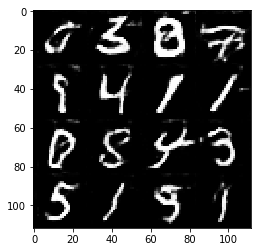

Epoch 2/2... Discriminator Loss: 1.4084... Generator Loss: 2.1917
Epoch 2/2... Discriminator Loss: 1.1863... Generator Loss: 0.9619
Epoch 2/2... Discriminator Loss: 1.2001... Generator Loss: 0.7907
Epoch 2/2... Discriminator Loss: 1.4664... Generator Loss: 0.6031
Epoch 2/2... Discriminator Loss: 1.3685... Generator Loss: 0.6866
Epoch 2/2... Discriminator Loss: 1.4590... Generator Loss: 0.6018
Epoch 2/2... Discriminator Loss: 1.5767... Generator Loss: 2.9389
Epoch 2/2... Discriminator Loss: 1.0673... Generator Loss: 1.2101
Epoch 2/2... Discriminator Loss: 1.1933... Generator Loss: 0.8581
Epoch 2/2... Discriminator Loss: 1.1386... Generator Loss: 1.0022


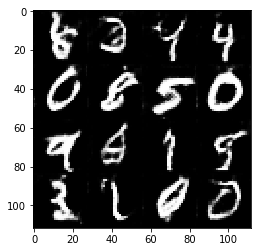

Epoch 2/2... Discriminator Loss: 1.1590... Generator Loss: 1.7972
Epoch 2/2... Discriminator Loss: 1.1421... Generator Loss: 0.9388
Epoch 2/2... Discriminator Loss: 1.0826... Generator Loss: 1.2367
Epoch 2/2... Discriminator Loss: 1.4425... Generator Loss: 0.5794
Epoch 2/2... Discriminator Loss: 1.2071... Generator Loss: 0.8543
Epoch 2/2... Discriminator Loss: 1.4810... Generator Loss: 0.5885
Epoch 2/2... Discriminator Loss: 1.2033... Generator Loss: 1.7266
Epoch 2/2... Discriminator Loss: 1.5215... Generator Loss: 0.5112
Epoch 2/2... Discriminator Loss: 1.3985... Generator Loss: 0.6242
Epoch 2/2... Discriminator Loss: 1.1082... Generator Loss: 1.2104


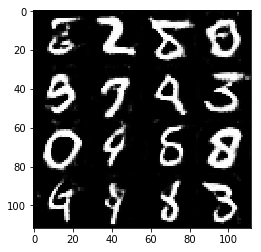

Epoch 2/2... Discriminator Loss: 1.1588... Generator Loss: 1.2088
Epoch 2/2... Discriminator Loss: 1.3843... Generator Loss: 0.6398
Epoch 2/2... Discriminator Loss: 1.4145... Generator Loss: 0.6416
Epoch 2/2... Discriminator Loss: 1.0266... Generator Loss: 1.2507
Epoch 2/2... Discriminator Loss: 1.2873... Generator Loss: 1.1936
Epoch 2/2... Discriminator Loss: 1.4214... Generator Loss: 0.6635
Epoch 2/2... Discriminator Loss: 1.4569... Generator Loss: 0.6125
Epoch 2/2... Discriminator Loss: 1.1004... Generator Loss: 0.9601
Epoch 2/2... Discriminator Loss: 1.4144... Generator Loss: 0.8043
Epoch 2/2... Discriminator Loss: 1.3546... Generator Loss: 0.7306


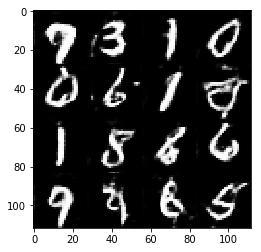

Epoch 2/2... Discriminator Loss: 1.2802... Generator Loss: 1.6009
Epoch 2/2... Discriminator Loss: 1.5256... Generator Loss: 0.5578
Epoch 2/2... Discriminator Loss: 1.1984... Generator Loss: 1.6267
Epoch 2/2... Discriminator Loss: 1.0398... Generator Loss: 1.1622
Epoch 2/2... Discriminator Loss: 1.4153... Generator Loss: 0.6318
Epoch 2/2... Discriminator Loss: 1.2398... Generator Loss: 0.7654
Epoch 2/2... Discriminator Loss: 1.2043... Generator Loss: 0.8278
Epoch 2/2... Discriminator Loss: 1.1517... Generator Loss: 1.3113
Epoch 2/2... Discriminator Loss: 1.1811... Generator Loss: 1.2482
Epoch 2/2... Discriminator Loss: 1.3052... Generator Loss: 1.9114


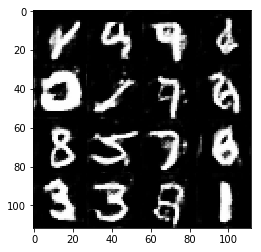

Epoch 2/2... Discriminator Loss: 1.2081... Generator Loss: 1.4465
Epoch 2/2... Discriminator Loss: 1.2180... Generator Loss: 0.9822
Epoch 2/2... Discriminator Loss: 1.1818... Generator Loss: 0.8737
Epoch 2/2... Discriminator Loss: 1.3087... Generator Loss: 1.7871
Epoch 2/2... Discriminator Loss: 1.1017... Generator Loss: 0.9367
Epoch 2/2... Discriminator Loss: 1.1971... Generator Loss: 0.9411
Epoch 2/2... Discriminator Loss: 1.3095... Generator Loss: 0.7697
Epoch 2/2... Discriminator Loss: 1.3658... Generator Loss: 0.6883
Epoch 2/2... Discriminator Loss: 1.4172... Generator Loss: 0.6513
Epoch 2/2... Discriminator Loss: 1.0801... Generator Loss: 1.1373


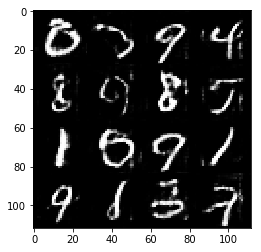

Epoch 2/2... Discriminator Loss: 1.5635... Generator Loss: 1.7240
Epoch 2/2... Discriminator Loss: 1.4061... Generator Loss: 2.1200
Epoch 2/2... Discriminator Loss: 1.1615... Generator Loss: 1.1964
Epoch 2/2... Discriminator Loss: 1.4623... Generator Loss: 0.6544
Epoch 2/2... Discriminator Loss: 1.1640... Generator Loss: 1.1821
Epoch 2/2... Discriminator Loss: 1.6979... Generator Loss: 0.4422
Epoch 2/2... Discriminator Loss: 1.3807... Generator Loss: 0.7426
Epoch 2/2... Discriminator Loss: 1.2321... Generator Loss: 1.3036
Epoch 2/2... Discriminator Loss: 0.9967... Generator Loss: 1.4993
Epoch 2/2... Discriminator Loss: 1.4028... Generator Loss: 0.7038


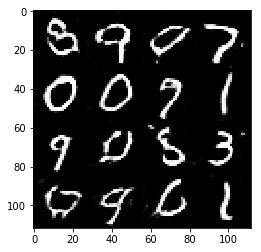

Epoch 2/2... Discriminator Loss: 1.5697... Generator Loss: 0.5201
Epoch 2/2... Discriminator Loss: 1.0971... Generator Loss: 1.7112
Epoch 2/2... Discriminator Loss: 1.3708... Generator Loss: 1.7061
Epoch 2/2... Discriminator Loss: 1.2754... Generator Loss: 1.2361
Epoch 2/2... Discriminator Loss: 1.1718... Generator Loss: 0.9916
Epoch 2/2... Discriminator Loss: 1.2726... Generator Loss: 1.2951
Epoch 2/2... Discriminator Loss: 1.3152... Generator Loss: 0.7039
Epoch 2/2... Discriminator Loss: 1.0666... Generator Loss: 1.0586
Epoch 2/2... Discriminator Loss: 1.1050... Generator Loss: 1.2510
Epoch 2/2... Discriminator Loss: 1.2222... Generator Loss: 1.0603


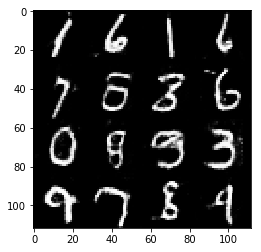

Epoch 2/2... Discriminator Loss: 1.0961... Generator Loss: 1.2038
Epoch 2/2... Discriminator Loss: 1.2789... Generator Loss: 0.7642
Epoch 2/2... Discriminator Loss: 0.9525... Generator Loss: 1.7147
Epoch 2/2... Discriminator Loss: 1.1500... Generator Loss: 1.2143
Epoch 2/2... Discriminator Loss: 1.5519... Generator Loss: 2.1799
Epoch 2/2... Discriminator Loss: 0.9380... Generator Loss: 1.2853
Epoch 2/2... Discriminator Loss: 1.1236... Generator Loss: 1.5093
Epoch 2/2... Discriminator Loss: 1.2567... Generator Loss: 0.9809
Epoch 2/2... Discriminator Loss: 1.1022... Generator Loss: 0.9926
Epoch 2/2... Discriminator Loss: 1.2625... Generator Loss: 2.2536


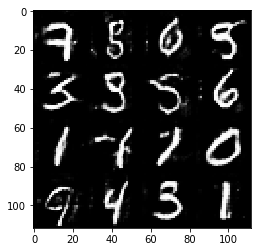

Epoch 2/2... Discriminator Loss: 1.6114... Generator Loss: 0.4719
Epoch 2/2... Discriminator Loss: 1.3315... Generator Loss: 0.7904
Epoch 2/2... Discriminator Loss: 1.5869... Generator Loss: 0.5284
Epoch 2/2... Discriminator Loss: 1.0699... Generator Loss: 1.8193
Epoch 2/2... Discriminator Loss: 1.3645... Generator Loss: 0.6769
Epoch 2/2... Discriminator Loss: 1.2637... Generator Loss: 2.0749
Epoch 2/2... Discriminator Loss: 1.0743... Generator Loss: 1.1143
Epoch 2/2... Discriminator Loss: 1.1627... Generator Loss: 0.9687
Epoch 2/2... Discriminator Loss: 1.0509... Generator Loss: 1.5375
Epoch 2/2... Discriminator Loss: 1.2706... Generator Loss: 1.8705


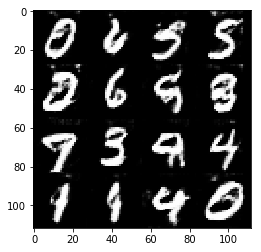

Epoch 2/2... Discriminator Loss: 1.0471... Generator Loss: 1.2591
Epoch 2/2... Discriminator Loss: 1.2889... Generator Loss: 0.9640
Epoch 2/2... Discriminator Loss: 1.5412... Generator Loss: 0.5379
Epoch 2/2... Discriminator Loss: 1.2790... Generator Loss: 0.8386
Epoch 2/2... Discriminator Loss: 1.2436... Generator Loss: 0.8236
Epoch 2/2... Discriminator Loss: 1.1950... Generator Loss: 0.9103
Epoch 2/2... Discriminator Loss: 1.2740... Generator Loss: 0.7857
Epoch 2/2... Discriminator Loss: 1.2733... Generator Loss: 0.8495
Epoch 2/2... Discriminator Loss: 1.3012... Generator Loss: 0.7164
Epoch 2/2... Discriminator Loss: 1.0367... Generator Loss: 1.0612


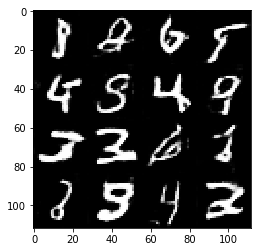

In [16]:
batch_size = 50
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: -0.0823... Generator Loss: 20.7183
Epoch 1/1... Discriminator Loss: 6.6201... Generator Loss: 0.1930
Epoch 1/1... Discriminator Loss: 1.7902... Generator Loss: 4.0169
Epoch 1/1... Discriminator Loss: 1.2622... Generator Loss: 2.9093
Epoch 1/1... Discriminator Loss: 0.8640... Generator Loss: 1.4708
Epoch 1/1... Discriminator Loss: 0.8322... Generator Loss: 5.1210
Epoch 1/1... Discriminator Loss: 3.2152... Generator Loss: 0.0728
Epoch 1/1... Discriminator Loss: 4.1625... Generator Loss: 7.6012
Epoch 1/1... Discriminator Loss: 1.3386... Generator Loss: 0.4305
Epoch 1/1... Discriminator Loss: 2.5893... Generator Loss: 0.1043


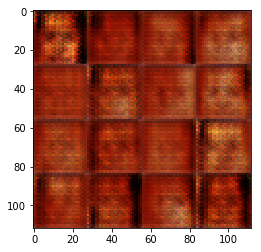

Epoch 1/1... Discriminator Loss: 1.2516... Generator Loss: 1.0964
Epoch 1/1... Discriminator Loss: 1.4880... Generator Loss: 0.4916
Epoch 1/1... Discriminator Loss: 1.4418... Generator Loss: 0.3793
Epoch 1/1... Discriminator Loss: 2.2247... Generator Loss: 1.5495
Epoch 1/1... Discriminator Loss: 1.3253... Generator Loss: 0.5812
Epoch 1/1... Discriminator Loss: 2.0359... Generator Loss: 0.4822
Epoch 1/1... Discriminator Loss: 1.1002... Generator Loss: 0.7926
Epoch 1/1... Discriminator Loss: 2.3424... Generator Loss: 2.6685
Epoch 1/1... Discriminator Loss: 1.0442... Generator Loss: 0.9771
Epoch 1/1... Discriminator Loss: 1.1035... Generator Loss: 1.4389


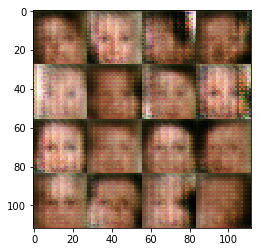

Epoch 1/1... Discriminator Loss: 2.0328... Generator Loss: 0.3384
Epoch 1/1... Discriminator Loss: 1.3241... Generator Loss: 0.5070
Epoch 1/1... Discriminator Loss: 2.0074... Generator Loss: 0.3870
Epoch 1/1... Discriminator Loss: 1.0627... Generator Loss: 0.7486
Epoch 1/1... Discriminator Loss: 1.8354... Generator Loss: 0.8411
Epoch 1/1... Discriminator Loss: 1.4045... Generator Loss: 0.4200
Epoch 1/1... Discriminator Loss: 1.4614... Generator Loss: 0.4425
Epoch 1/1... Discriminator Loss: 1.1914... Generator Loss: 0.6785
Epoch 1/1... Discriminator Loss: 1.5663... Generator Loss: 0.3754
Epoch 1/1... Discriminator Loss: 1.1724... Generator Loss: 0.7028


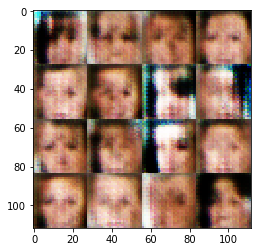

Epoch 1/1... Discriminator Loss: 2.4734... Generator Loss: 0.1593
Epoch 1/1... Discriminator Loss: 2.4572... Generator Loss: 0.1386
Epoch 1/1... Discriminator Loss: 1.0994... Generator Loss: 0.6899
Epoch 1/1... Discriminator Loss: 1.1582... Generator Loss: 0.7170
Epoch 1/1... Discriminator Loss: 1.5670... Generator Loss: 0.9241
Epoch 1/1... Discriminator Loss: 1.4183... Generator Loss: 0.9493
Epoch 1/1... Discriminator Loss: 1.6477... Generator Loss: 0.3689
Epoch 1/1... Discriminator Loss: 1.9934... Generator Loss: 0.3373
Epoch 1/1... Discriminator Loss: 0.9176... Generator Loss: 1.0334
Epoch 1/1... Discriminator Loss: 1.6975... Generator Loss: 0.4850


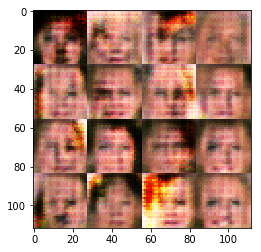

Epoch 1/1... Discriminator Loss: 0.7681... Generator Loss: 0.8217
Epoch 1/1... Discriminator Loss: 1.5752... Generator Loss: 0.4707
Epoch 1/1... Discriminator Loss: 1.7920... Generator Loss: 0.2572
Epoch 1/1... Discriminator Loss: 1.3810... Generator Loss: 1.5193
Epoch 1/1... Discriminator Loss: 1.2705... Generator Loss: 0.6254
Epoch 1/1... Discriminator Loss: 1.7830... Generator Loss: 0.4702
Epoch 1/1... Discriminator Loss: 1.2369... Generator Loss: 0.4361
Epoch 1/1... Discriminator Loss: 1.4841... Generator Loss: 0.5141
Epoch 1/1... Discriminator Loss: 1.0051... Generator Loss: 0.9182
Epoch 1/1... Discriminator Loss: 1.3932... Generator Loss: 0.5961


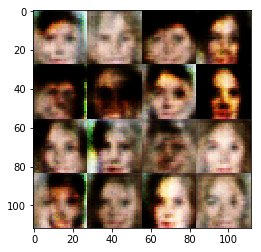

Epoch 1/1... Discriminator Loss: 2.1052... Generator Loss: 0.2327
Epoch 1/1... Discriminator Loss: 1.0368... Generator Loss: 1.2752
Epoch 1/1... Discriminator Loss: 1.3580... Generator Loss: 0.5662
Epoch 1/1... Discriminator Loss: 1.6875... Generator Loss: 1.3905
Epoch 1/1... Discriminator Loss: 1.1742... Generator Loss: 0.6991
Epoch 1/1... Discriminator Loss: 1.3056... Generator Loss: 0.6684
Epoch 1/1... Discriminator Loss: 1.2042... Generator Loss: 0.7600
Epoch 1/1... Discriminator Loss: 1.8116... Generator Loss: 0.7336
Epoch 1/1... Discriminator Loss: 1.3195... Generator Loss: 0.8077
Epoch 1/1... Discriminator Loss: 1.6426... Generator Loss: 0.5975


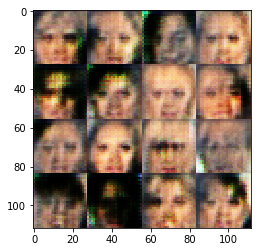

Epoch 1/1... Discriminator Loss: 1.2691... Generator Loss: 0.7358
Epoch 1/1... Discriminator Loss: 0.9711... Generator Loss: 0.9217
Epoch 1/1... Discriminator Loss: 1.2582... Generator Loss: 0.6504
Epoch 1/1... Discriminator Loss: 1.3175... Generator Loss: 0.4529
Epoch 1/1... Discriminator Loss: 1.4973... Generator Loss: 0.4665
Epoch 1/1... Discriminator Loss: 1.4002... Generator Loss: 0.7120
Epoch 1/1... Discriminator Loss: 1.3212... Generator Loss: 0.5784
Epoch 1/1... Discriminator Loss: 2.4222... Generator Loss: 2.3478
Epoch 1/1... Discriminator Loss: 1.5255... Generator Loss: 1.7147
Epoch 1/1... Discriminator Loss: 1.5190... Generator Loss: 0.5017


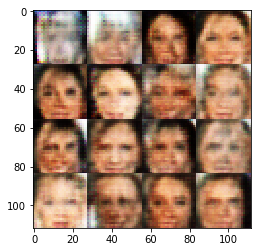

Epoch 1/1... Discriminator Loss: 1.4697... Generator Loss: 0.4568
Epoch 1/1... Discriminator Loss: 1.1640... Generator Loss: 0.9674
Epoch 1/1... Discriminator Loss: 1.6738... Generator Loss: 0.5554
Epoch 1/1... Discriminator Loss: 1.3635... Generator Loss: 0.5468
Epoch 1/1... Discriminator Loss: 1.2650... Generator Loss: 0.6830
Epoch 1/1... Discriminator Loss: 1.4530... Generator Loss: 0.4123
Epoch 1/1... Discriminator Loss: 1.2086... Generator Loss: 0.8410
Epoch 1/1... Discriminator Loss: 1.5218... Generator Loss: 0.3904
Epoch 1/1... Discriminator Loss: 1.3789... Generator Loss: 0.3970
Epoch 1/1... Discriminator Loss: 1.2973... Generator Loss: 0.9829


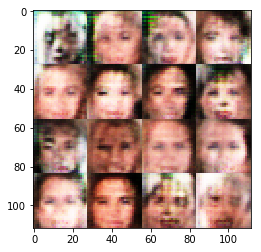

Epoch 1/1... Discriminator Loss: 1.4457... Generator Loss: 0.6235
Epoch 1/1... Discriminator Loss: 1.3886... Generator Loss: 0.7215
Epoch 1/1... Discriminator Loss: 1.2781... Generator Loss: 0.6037
Epoch 1/1... Discriminator Loss: 1.2481... Generator Loss: 0.6200
Epoch 1/1... Discriminator Loss: 1.3818... Generator Loss: 0.4213
Epoch 1/1... Discriminator Loss: 1.7648... Generator Loss: 0.3404
Epoch 1/1... Discriminator Loss: 2.0310... Generator Loss: 1.9066
Epoch 1/1... Discriminator Loss: 1.4708... Generator Loss: 0.4095
Epoch 1/1... Discriminator Loss: 0.9831... Generator Loss: 0.6353
Epoch 1/1... Discriminator Loss: 1.2750... Generator Loss: 0.8279


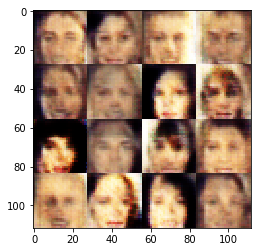

Epoch 1/1... Discriminator Loss: 1.3157... Generator Loss: 0.8770
Epoch 1/1... Discriminator Loss: 1.5892... Generator Loss: 0.8864
Epoch 1/1... Discriminator Loss: 1.1954... Generator Loss: 0.5855
Epoch 1/1... Discriminator Loss: 1.2743... Generator Loss: 1.1374
Epoch 1/1... Discriminator Loss: 1.5489... Generator Loss: 1.2325
Epoch 1/1... Discriminator Loss: 1.2002... Generator Loss: 0.9008
Epoch 1/1... Discriminator Loss: 1.5305... Generator Loss: 0.4523
Epoch 1/1... Discriminator Loss: 1.3576... Generator Loss: 0.9861
Epoch 1/1... Discriminator Loss: 1.2575... Generator Loss: 0.6340
Epoch 1/1... Discriminator Loss: 1.5779... Generator Loss: 0.6280


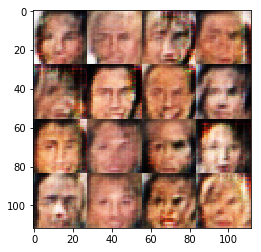

Epoch 1/1... Discriminator Loss: 1.3875... Generator Loss: 0.7292
Epoch 1/1... Discriminator Loss: 1.9176... Generator Loss: 0.6765
Epoch 1/1... Discriminator Loss: 1.4073... Generator Loss: 0.4868
Epoch 1/1... Discriminator Loss: 1.6158... Generator Loss: 0.3895
Epoch 1/1... Discriminator Loss: 1.3575... Generator Loss: 0.4923
Epoch 1/1... Discriminator Loss: 1.4559... Generator Loss: 0.6885
Epoch 1/1... Discriminator Loss: 1.3686... Generator Loss: 0.4807
Epoch 1/1... Discriminator Loss: 1.4053... Generator Loss: 0.4385
Epoch 1/1... Discriminator Loss: 1.3204... Generator Loss: 1.4937
Epoch 1/1... Discriminator Loss: 1.4924... Generator Loss: 0.9588


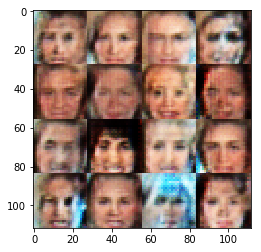

Epoch 1/1... Discriminator Loss: 1.1986... Generator Loss: 0.6302
Epoch 1/1... Discriminator Loss: 1.2153... Generator Loss: 0.7775
Epoch 1/1... Discriminator Loss: 1.2772... Generator Loss: 1.5779
Epoch 1/1... Discriminator Loss: 1.2871... Generator Loss: 0.9088
Epoch 1/1... Discriminator Loss: 1.8320... Generator Loss: 0.4509
Epoch 1/1... Discriminator Loss: 1.3763... Generator Loss: 0.6134
Epoch 1/1... Discriminator Loss: 1.5998... Generator Loss: 0.5871
Epoch 1/1... Discriminator Loss: 1.2928... Generator Loss: 0.5714
Epoch 1/1... Discriminator Loss: 1.7142... Generator Loss: 0.3248
Epoch 1/1... Discriminator Loss: 1.6214... Generator Loss: 0.5572


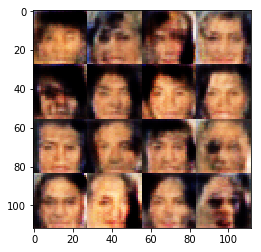

Epoch 1/1... Discriminator Loss: 1.3403... Generator Loss: 0.4585
Epoch 1/1... Discriminator Loss: 1.4490... Generator Loss: 0.8257
Epoch 1/1... Discriminator Loss: 1.2638... Generator Loss: 0.8849
Epoch 1/1... Discriminator Loss: 1.4621... Generator Loss: 0.6304
Epoch 1/1... Discriminator Loss: 1.5781... Generator Loss: 0.4498
Epoch 1/1... Discriminator Loss: 1.1922... Generator Loss: 0.6761
Epoch 1/1... Discriminator Loss: 1.3500... Generator Loss: 0.7308
Epoch 1/1... Discriminator Loss: 1.1742... Generator Loss: 0.9262
Epoch 1/1... Discriminator Loss: 1.2019... Generator Loss: 0.4826
Epoch 1/1... Discriminator Loss: 1.1804... Generator Loss: 0.8006


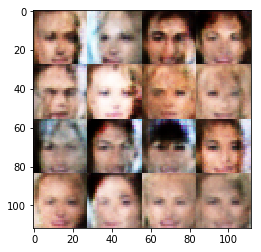

Epoch 1/1... Discriminator Loss: 1.3310... Generator Loss: 0.6625
Epoch 1/1... Discriminator Loss: 1.4290... Generator Loss: 0.8598
Epoch 1/1... Discriminator Loss: 1.2395... Generator Loss: 0.6080
Epoch 1/1... Discriminator Loss: 1.2594... Generator Loss: 0.6135
Epoch 1/1... Discriminator Loss: 1.3305... Generator Loss: 0.7901
Epoch 1/1... Discriminator Loss: 1.1167... Generator Loss: 0.6501
Epoch 1/1... Discriminator Loss: 1.2775... Generator Loss: 0.8767
Epoch 1/1... Discriminator Loss: 1.4663... Generator Loss: 0.6542
Epoch 1/1... Discriminator Loss: 1.5485... Generator Loss: 0.6844
Epoch 1/1... Discriminator Loss: 1.3723... Generator Loss: 0.7053


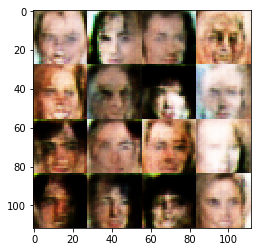

Epoch 1/1... Discriminator Loss: 1.6556... Generator Loss: 0.4991
Epoch 1/1... Discriminator Loss: 1.3637... Generator Loss: 0.4139
Epoch 1/1... Discriminator Loss: 1.1114... Generator Loss: 0.8330
Epoch 1/1... Discriminator Loss: 1.2910... Generator Loss: 0.6862
Epoch 1/1... Discriminator Loss: 1.2675... Generator Loss: 0.6656
Epoch 1/1... Discriminator Loss: 1.4211... Generator Loss: 0.4354
Epoch 1/1... Discriminator Loss: 1.4109... Generator Loss: 0.7015
Epoch 1/1... Discriminator Loss: 1.5791... Generator Loss: 0.4603
Epoch 1/1... Discriminator Loss: 1.4016... Generator Loss: 0.6675
Epoch 1/1... Discriminator Loss: 1.4218... Generator Loss: 0.4441


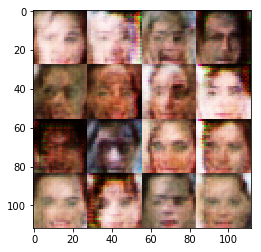

Epoch 1/1... Discriminator Loss: 1.4447... Generator Loss: 0.4446
Epoch 1/1... Discriminator Loss: 1.4697... Generator Loss: 0.4855
Epoch 1/1... Discriminator Loss: 1.1653... Generator Loss: 0.8091
Epoch 1/1... Discriminator Loss: 1.4890... Generator Loss: 0.3699
Epoch 1/1... Discriminator Loss: 1.3964... Generator Loss: 0.4352
Epoch 1/1... Discriminator Loss: 1.3039... Generator Loss: 0.5293
Epoch 1/1... Discriminator Loss: 1.6543... Generator Loss: 0.2302
Epoch 1/1... Discriminator Loss: 1.3431... Generator Loss: 0.4561
Epoch 1/1... Discriminator Loss: 1.3056... Generator Loss: 0.6614
Epoch 1/1... Discriminator Loss: 1.4297... Generator Loss: 0.6595


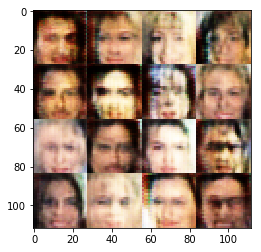

Epoch 1/1... Discriminator Loss: 1.2004... Generator Loss: 0.5061
Epoch 1/1... Discriminator Loss: 1.1685... Generator Loss: 0.5588
Epoch 1/1... Discriminator Loss: 1.3235... Generator Loss: 0.4448
Epoch 1/1... Discriminator Loss: 1.1671... Generator Loss: 0.9303
Epoch 1/1... Discriminator Loss: 2.0216... Generator Loss: 0.1782
Epoch 1/1... Discriminator Loss: 1.5990... Generator Loss: 0.3525
Epoch 1/1... Discriminator Loss: 1.4000... Generator Loss: 0.7326
Epoch 1/1... Discriminator Loss: 1.2224... Generator Loss: 0.7548
Epoch 1/1... Discriminator Loss: 1.4989... Generator Loss: 0.4724
Epoch 1/1... Discriminator Loss: 1.5573... Generator Loss: 0.7805


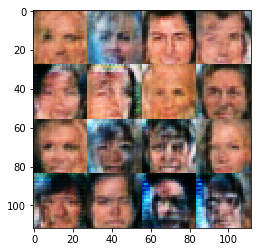

Epoch 1/1... Discriminator Loss: 1.1963... Generator Loss: 0.8160
Epoch 1/1... Discriminator Loss: 1.5389... Generator Loss: 0.3702
Epoch 1/1... Discriminator Loss: 1.4706... Generator Loss: 0.5887
Epoch 1/1... Discriminator Loss: 1.2337... Generator Loss: 0.6419
Epoch 1/1... Discriminator Loss: 1.4578... Generator Loss: 0.6835
Epoch 1/1... Discriminator Loss: 1.2098... Generator Loss: 0.8258
Epoch 1/1... Discriminator Loss: 1.5960... Generator Loss: 1.5774
Epoch 1/1... Discriminator Loss: 1.3780... Generator Loss: 0.4982
Epoch 1/1... Discriminator Loss: 1.4005... Generator Loss: 0.6284
Epoch 1/1... Discriminator Loss: 1.5622... Generator Loss: 0.8571


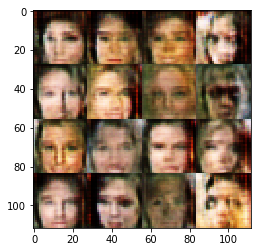

Epoch 1/1... Discriminator Loss: 1.1058... Generator Loss: 0.8518
Epoch 1/1... Discriminator Loss: 1.4427... Generator Loss: 0.6968
Epoch 1/1... Discriminator Loss: 1.7236... Generator Loss: 0.2771
Epoch 1/1... Discriminator Loss: 1.3837... Generator Loss: 0.7320
Epoch 1/1... Discriminator Loss: 1.3343... Generator Loss: 0.4385
Epoch 1/1... Discriminator Loss: 1.4467... Generator Loss: 0.9780
Epoch 1/1... Discriminator Loss: 1.0316... Generator Loss: 0.8031
Epoch 1/1... Discriminator Loss: 1.4061... Generator Loss: 0.8779
Epoch 1/1... Discriminator Loss: 1.4192... Generator Loss: 1.1342
Epoch 1/1... Discriminator Loss: 1.3320... Generator Loss: 0.7637


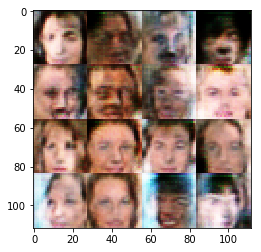

Epoch 1/1... Discriminator Loss: 1.3611... Generator Loss: 0.5970
Epoch 1/1... Discriminator Loss: 1.2537... Generator Loss: 0.7491
Epoch 1/1... Discriminator Loss: 1.4395... Generator Loss: 0.4152
Epoch 1/1... Discriminator Loss: 1.4117... Generator Loss: 0.3319
Epoch 1/1... Discriminator Loss: 1.3847... Generator Loss: 0.5689
Epoch 1/1... Discriminator Loss: 1.2982... Generator Loss: 0.6783
Epoch 1/1... Discriminator Loss: 1.3166... Generator Loss: 0.6490
Epoch 1/1... Discriminator Loss: 1.2885... Generator Loss: 0.8201
Epoch 1/1... Discriminator Loss: 1.3050... Generator Loss: 0.7122
Epoch 1/1... Discriminator Loss: 1.5469... Generator Loss: 0.3335


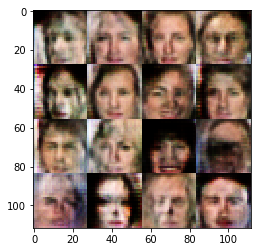

Epoch 1/1... Discriminator Loss: 1.2678... Generator Loss: 0.5785
Epoch 1/1... Discriminator Loss: 1.3306... Generator Loss: 0.6936
Epoch 1/1... Discriminator Loss: 1.3266... Generator Loss: 0.5270
Epoch 1/1... Discriminator Loss: 1.4477... Generator Loss: 0.5424
Epoch 1/1... Discriminator Loss: 1.2950... Generator Loss: 0.4009
Epoch 1/1... Discriminator Loss: 1.2307... Generator Loss: 0.5888
Epoch 1/1... Discriminator Loss: 1.4740... Generator Loss: 0.3811
Epoch 1/1... Discriminator Loss: 1.3019... Generator Loss: 0.7156
Epoch 1/1... Discriminator Loss: 1.2996... Generator Loss: 0.6880
Epoch 1/1... Discriminator Loss: 1.3901... Generator Loss: 0.4974


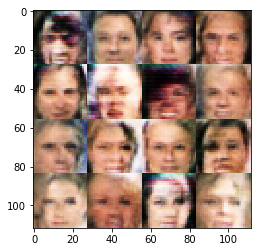

Epoch 1/1... Discriminator Loss: 1.3056... Generator Loss: 0.5777
Epoch 1/1... Discriminator Loss: 1.4073... Generator Loss: 0.5456
Epoch 1/1... Discriminator Loss: 1.2098... Generator Loss: 0.5975
Epoch 1/1... Discriminator Loss: 1.5633... Generator Loss: 0.4542
Epoch 1/1... Discriminator Loss: 1.4872... Generator Loss: 0.5559
Epoch 1/1... Discriminator Loss: 1.2258... Generator Loss: 0.8624
Epoch 1/1... Discriminator Loss: 1.5586... Generator Loss: 0.5087
Epoch 1/1... Discriminator Loss: 1.5955... Generator Loss: 0.4593
Epoch 1/1... Discriminator Loss: 1.5539... Generator Loss: 0.5744
Epoch 1/1... Discriminator Loss: 1.4830... Generator Loss: 0.8188


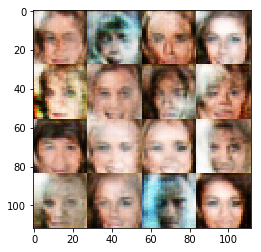

Epoch 1/1... Discriminator Loss: 1.3890... Generator Loss: 0.7408
Epoch 1/1... Discriminator Loss: 1.2516... Generator Loss: 0.6661
Epoch 1/1... Discriminator Loss: 1.7550... Generator Loss: 0.4247
Epoch 1/1... Discriminator Loss: 1.2707... Generator Loss: 0.8554
Epoch 1/1... Discriminator Loss: 1.4443... Generator Loss: 0.4822
Epoch 1/1... Discriminator Loss: 1.3799... Generator Loss: 0.5276
Epoch 1/1... Discriminator Loss: 1.4265... Generator Loss: 0.4829
Epoch 1/1... Discriminator Loss: 1.3062... Generator Loss: 0.7044
Epoch 1/1... Discriminator Loss: 1.3387... Generator Loss: 0.6736
Epoch 1/1... Discriminator Loss: 1.3632... Generator Loss: 0.6373


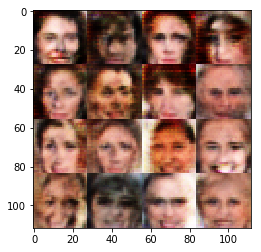

Epoch 1/1... Discriminator Loss: 1.1072... Generator Loss: 0.7778
Epoch 1/1... Discriminator Loss: 1.4830... Generator Loss: 0.5221
Epoch 1/1... Discriminator Loss: 1.2736... Generator Loss: 0.8940
Epoch 1/1... Discriminator Loss: 1.4619... Generator Loss: 0.7125
Epoch 1/1... Discriminator Loss: 1.5036... Generator Loss: 0.5282
Epoch 1/1... Discriminator Loss: 1.3900... Generator Loss: 0.5397
Epoch 1/1... Discriminator Loss: 1.4552... Generator Loss: 0.6069
Epoch 1/1... Discriminator Loss: 1.3259... Generator Loss: 0.5319
Epoch 1/1... Discriminator Loss: 1.3021... Generator Loss: 0.6530
Epoch 1/1... Discriminator Loss: 1.3500... Generator Loss: 0.8214


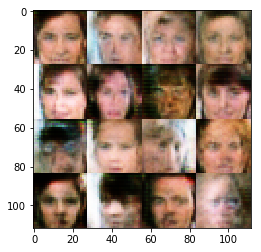

Epoch 1/1... Discriminator Loss: 1.4924... Generator Loss: 0.3566
Epoch 1/1... Discriminator Loss: 1.4447... Generator Loss: 0.4999
Epoch 1/1... Discriminator Loss: 1.2669... Generator Loss: 0.8108
Epoch 1/1... Discriminator Loss: 1.1742... Generator Loss: 0.5927
Epoch 1/1... Discriminator Loss: 1.3219... Generator Loss: 0.7962
Epoch 1/1... Discriminator Loss: 1.5918... Generator Loss: 0.3314
Epoch 1/1... Discriminator Loss: 1.3647... Generator Loss: 0.5231
Epoch 1/1... Discriminator Loss: 1.3276... Generator Loss: 0.5338
Epoch 1/1... Discriminator Loss: 1.0448... Generator Loss: 1.0336
Epoch 1/1... Discriminator Loss: 1.4260... Generator Loss: 0.8426


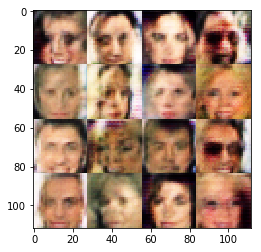

Epoch 1/1... Discriminator Loss: 1.3365... Generator Loss: 0.5940
Epoch 1/1... Discriminator Loss: 1.3498... Generator Loss: 0.5087
Epoch 1/1... Discriminator Loss: 1.2759... Generator Loss: 0.5111
Epoch 1/1... Discriminator Loss: 1.3492... Generator Loss: 0.5546
Epoch 1/1... Discriminator Loss: 1.4018... Generator Loss: 0.9232
Epoch 1/1... Discriminator Loss: 1.4160... Generator Loss: 0.4253
Epoch 1/1... Discriminator Loss: 1.4715... Generator Loss: 0.3711
Epoch 1/1... Discriminator Loss: 1.3908... Generator Loss: 0.4469
Epoch 1/1... Discriminator Loss: 1.4045... Generator Loss: 0.6050
Epoch 1/1... Discriminator Loss: 1.4301... Generator Loss: 0.3548


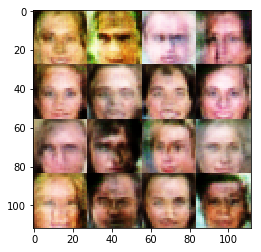

Epoch 1/1... Discriminator Loss: 1.6287... Generator Loss: 0.3179
Epoch 1/1... Discriminator Loss: 1.1303... Generator Loss: 0.7435
Epoch 1/1... Discriminator Loss: 1.2444... Generator Loss: 0.8525
Epoch 1/1... Discriminator Loss: 1.2646... Generator Loss: 0.7403
Epoch 1/1... Discriminator Loss: 1.3351... Generator Loss: 0.8636
Epoch 1/1... Discriminator Loss: 1.4755... Generator Loss: 0.8566
Epoch 1/1... Discriminator Loss: 1.5965... Generator Loss: 0.5290
Epoch 1/1... Discriminator Loss: 1.0224... Generator Loss: 0.8765
Epoch 1/1... Discriminator Loss: 1.5404... Generator Loss: 0.6016
Epoch 1/1... Discriminator Loss: 1.3426... Generator Loss: 0.4816


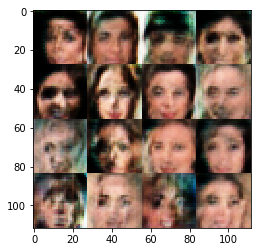

Epoch 1/1... Discriminator Loss: 1.3521... Generator Loss: 0.8930
Epoch 1/1... Discriminator Loss: 1.2964... Generator Loss: 0.7255
Epoch 1/1... Discriminator Loss: 1.2893... Generator Loss: 0.5780
Epoch 1/1... Discriminator Loss: 1.1432... Generator Loss: 0.6352
Epoch 1/1... Discriminator Loss: 1.1969... Generator Loss: 0.5057
Epoch 1/1... Discriminator Loss: 1.1039... Generator Loss: 0.7938
Epoch 1/1... Discriminator Loss: 1.2130... Generator Loss: 0.8882
Epoch 1/1... Discriminator Loss: 1.2697... Generator Loss: 0.4844
Epoch 1/1... Discriminator Loss: 1.3276... Generator Loss: 0.5207
Epoch 1/1... Discriminator Loss: 1.4946... Generator Loss: 0.3566


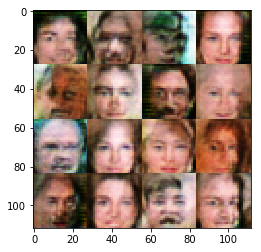

Epoch 1/1... Discriminator Loss: 1.3675... Generator Loss: 0.5302
Epoch 1/1... Discriminator Loss: 1.4607... Generator Loss: 0.7120
Epoch 1/1... Discriminator Loss: 1.3657... Generator Loss: 0.5611
Epoch 1/1... Discriminator Loss: 1.3191... Generator Loss: 0.5504
Epoch 1/1... Discriminator Loss: 1.3460... Generator Loss: 0.7547
Epoch 1/1... Discriminator Loss: 1.2893... Generator Loss: 0.8849
Epoch 1/1... Discriminator Loss: 1.3481... Generator Loss: 0.4845
Epoch 1/1... Discriminator Loss: 1.3510... Generator Loss: 0.5973
Epoch 1/1... Discriminator Loss: 1.3888... Generator Loss: 0.5868
Epoch 1/1... Discriminator Loss: 1.0844... Generator Loss: 0.7895


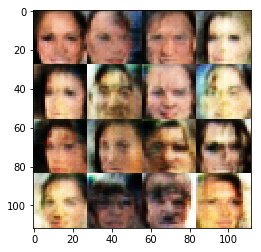

Epoch 1/1... Discriminator Loss: 1.3676... Generator Loss: 0.6964
Epoch 1/1... Discriminator Loss: 1.1350... Generator Loss: 0.9751
Epoch 1/1... Discriminator Loss: 1.4399... Generator Loss: 0.4807
Epoch 1/1... Discriminator Loss: 1.2458... Generator Loss: 0.8401
Epoch 1/1... Discriminator Loss: 1.3503... Generator Loss: 0.4349
Epoch 1/1... Discriminator Loss: 1.4248... Generator Loss: 0.4015
Epoch 1/1... Discriminator Loss: 1.3003... Generator Loss: 0.5644
Epoch 1/1... Discriminator Loss: 1.4590... Generator Loss: 0.5260
Epoch 1/1... Discriminator Loss: 1.3695... Generator Loss: 0.6786
Epoch 1/1... Discriminator Loss: 1.1744... Generator Loss: 0.5608


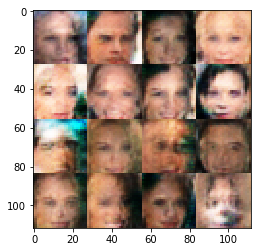

Epoch 1/1... Discriminator Loss: 1.4036... Generator Loss: 0.6833
Epoch 1/1... Discriminator Loss: 1.2675... Generator Loss: 0.6634
Epoch 1/1... Discriminator Loss: 1.3750... Generator Loss: 0.5170
Epoch 1/1... Discriminator Loss: 1.4794... Generator Loss: 0.6591
Epoch 1/1... Discriminator Loss: 1.4466... Generator Loss: 0.7863
Epoch 1/1... Discriminator Loss: 1.2380... Generator Loss: 0.5976
Epoch 1/1... Discriminator Loss: 1.3326... Generator Loss: 0.5513
Epoch 1/1... Discriminator Loss: 1.2127... Generator Loss: 0.6167
Epoch 1/1... Discriminator Loss: 1.4095... Generator Loss: 0.6003
Epoch 1/1... Discriminator Loss: 1.2726... Generator Loss: 0.8928


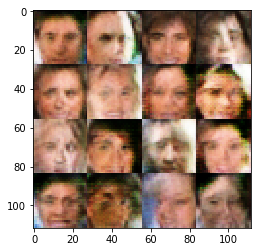

Epoch 1/1... Discriminator Loss: 1.3338... Generator Loss: 0.8397
Epoch 1/1... Discriminator Loss: 1.2348... Generator Loss: 0.8430
Epoch 1/1... Discriminator Loss: 1.3559... Generator Loss: 0.5837
Epoch 1/1... Discriminator Loss: 1.3469... Generator Loss: 0.4850
Epoch 1/1... Discriminator Loss: 1.5333... Generator Loss: 0.6369
Epoch 1/1... Discriminator Loss: 1.2596... Generator Loss: 0.7564
Epoch 1/1... Discriminator Loss: 1.3645... Generator Loss: 1.0250
Epoch 1/1... Discriminator Loss: 1.3394... Generator Loss: 0.4447
Epoch 1/1... Discriminator Loss: 1.3360... Generator Loss: 0.6202
Epoch 1/1... Discriminator Loss: 1.2457... Generator Loss: 0.5694


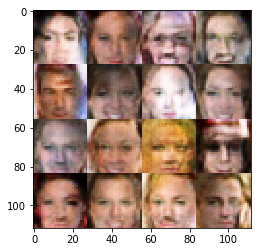

Epoch 1/1... Discriminator Loss: 1.2534... Generator Loss: 0.5780
Epoch 1/1... Discriminator Loss: 1.5159... Generator Loss: 0.4015
Epoch 1/1... Discriminator Loss: 1.4202... Generator Loss: 1.1261
Epoch 1/1... Discriminator Loss: 1.2244... Generator Loss: 0.7939
Epoch 1/1... Discriminator Loss: 1.3111... Generator Loss: 0.4802
Epoch 1/1... Discriminator Loss: 1.2201... Generator Loss: 0.5680
Epoch 1/1... Discriminator Loss: 1.2360... Generator Loss: 0.6430
Epoch 1/1... Discriminator Loss: 1.2644... Generator Loss: 0.6106
Epoch 1/1... Discriminator Loss: 1.4202... Generator Loss: 0.5016
Epoch 1/1... Discriminator Loss: 1.5217... Generator Loss: 0.5677


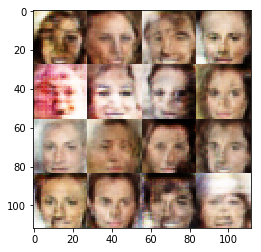

Epoch 1/1... Discriminator Loss: 1.3357... Generator Loss: 0.6457
Epoch 1/1... Discriminator Loss: 1.1794... Generator Loss: 0.7261
Epoch 1/1... Discriminator Loss: 1.4527... Generator Loss: 0.4824
Epoch 1/1... Discriminator Loss: 1.2994... Generator Loss: 0.5512
Epoch 1/1... Discriminator Loss: 1.4811... Generator Loss: 0.6412
Epoch 1/1... Discriminator Loss: 1.6193... Generator Loss: 0.9765
Epoch 1/1... Discriminator Loss: 1.3342... Generator Loss: 0.4730
Epoch 1/1... Discriminator Loss: 1.4348... Generator Loss: 0.5039
Epoch 1/1... Discriminator Loss: 1.3686... Generator Loss: 0.5640
Epoch 1/1... Discriminator Loss: 1.4427... Generator Loss: 0.4756


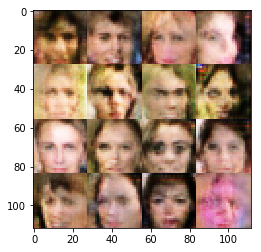

Epoch 1/1... Discriminator Loss: 1.6110... Generator Loss: 0.4421
Epoch 1/1... Discriminator Loss: 1.2750... Generator Loss: 0.6369
Epoch 1/1... Discriminator Loss: 1.3872... Generator Loss: 0.7023
Epoch 1/1... Discriminator Loss: 1.3700... Generator Loss: 0.3978
Epoch 1/1... Discriminator Loss: 1.4177... Generator Loss: 0.4349
Epoch 1/1... Discriminator Loss: 1.1569... Generator Loss: 0.6291
Epoch 1/1... Discriminator Loss: 1.2035... Generator Loss: 0.8500
Epoch 1/1... Discriminator Loss: 1.4529... Generator Loss: 0.4561
Epoch 1/1... Discriminator Loss: 1.4115... Generator Loss: 0.4220
Epoch 1/1... Discriminator Loss: 1.3801... Generator Loss: 0.5652


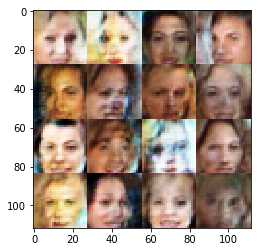

Epoch 1/1... Discriminator Loss: 1.5425... Generator Loss: 0.3649
Epoch 1/1... Discriminator Loss: 1.2837... Generator Loss: 0.4623
Epoch 1/1... Discriminator Loss: 1.2765... Generator Loss: 0.9770
Epoch 1/1... Discriminator Loss: 1.2384... Generator Loss: 0.6983
Epoch 1/1... Discriminator Loss: 1.3947... Generator Loss: 0.4484
Epoch 1/1... Discriminator Loss: 1.4059... Generator Loss: 0.6080
Epoch 1/1... Discriminator Loss: 1.3498... Generator Loss: 0.4592
Epoch 1/1... Discriminator Loss: 1.4023... Generator Loss: 0.8171
Epoch 1/1... Discriminator Loss: 1.2969... Generator Loss: 0.6683
Epoch 1/1... Discriminator Loss: 1.4842... Generator Loss: 0.4189


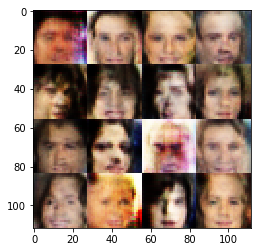

Epoch 1/1... Discriminator Loss: 1.4994... Generator Loss: 0.7917
Epoch 1/1... Discriminator Loss: 1.3218... Generator Loss: 0.6584
Epoch 1/1... Discriminator Loss: 1.2619... Generator Loss: 0.4677
Epoch 1/1... Discriminator Loss: 1.3664... Generator Loss: 0.5472
Epoch 1/1... Discriminator Loss: 1.3720... Generator Loss: 0.6179
Epoch 1/1... Discriminator Loss: 1.4917... Generator Loss: 1.0180
Epoch 1/1... Discriminator Loss: 1.2016... Generator Loss: 0.7423
Epoch 1/1... Discriminator Loss: 1.2715... Generator Loss: 0.6312
Epoch 1/1... Discriminator Loss: 1.3882... Generator Loss: 0.6336
Epoch 1/1... Discriminator Loss: 1.3992... Generator Loss: 0.4561


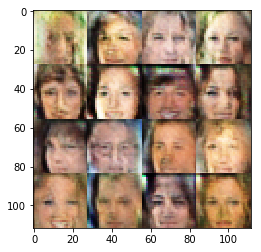

Epoch 1/1... Discriminator Loss: 1.2870... Generator Loss: 0.6174
Epoch 1/1... Discriminator Loss: 1.2548... Generator Loss: 0.5917
Epoch 1/1... Discriminator Loss: 1.2890... Generator Loss: 0.5122
Epoch 1/1... Discriminator Loss: 1.4837... Generator Loss: 0.7325
Epoch 1/1... Discriminator Loss: 1.4762... Generator Loss: 0.3551
Epoch 1/1... Discriminator Loss: 1.2206... Generator Loss: 0.8356
Epoch 1/1... Discriminator Loss: 1.3416... Generator Loss: 0.5587
Epoch 1/1... Discriminator Loss: 1.2629... Generator Loss: 0.7016
Epoch 1/1... Discriminator Loss: 1.3680... Generator Loss: 0.5815
Epoch 1/1... Discriminator Loss: 1.2273... Generator Loss: 0.6977


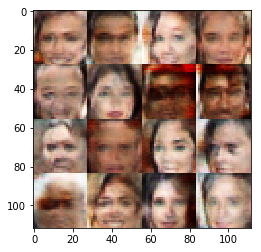

Epoch 1/1... Discriminator Loss: 1.3159... Generator Loss: 0.5808
Epoch 1/1... Discriminator Loss: 1.4304... Generator Loss: 0.4057
Epoch 1/1... Discriminator Loss: 1.3143... Generator Loss: 0.5547
Epoch 1/1... Discriminator Loss: 1.3680... Generator Loss: 0.4278
Epoch 1/1... Discriminator Loss: 1.6269... Generator Loss: 0.4121
Epoch 1/1... Discriminator Loss: 1.5873... Generator Loss: 0.4572
Epoch 1/1... Discriminator Loss: 1.4032... Generator Loss: 0.5945
Epoch 1/1... Discriminator Loss: 1.4047... Generator Loss: 0.6714
Epoch 1/1... Discriminator Loss: 1.5390... Generator Loss: 0.5619
Epoch 1/1... Discriminator Loss: 1.4064... Generator Loss: 0.4961


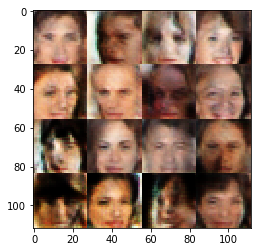

Epoch 1/1... Discriminator Loss: 1.2268... Generator Loss: 0.7098
Epoch 1/1... Discriminator Loss: 1.2877... Generator Loss: 0.5212
Epoch 1/1... Discriminator Loss: 1.3226... Generator Loss: 0.5752
Epoch 1/1... Discriminator Loss: 1.3273... Generator Loss: 0.5444
Epoch 1/1... Discriminator Loss: 1.3710... Generator Loss: 0.5150
Epoch 1/1... Discriminator Loss: 1.2971... Generator Loss: 0.4834
Epoch 1/1... Discriminator Loss: 1.3305... Generator Loss: 0.6093
Epoch 1/1... Discriminator Loss: 1.5001... Generator Loss: 0.6531
Epoch 1/1... Discriminator Loss: 1.2458... Generator Loss: 0.6373
Epoch 1/1... Discriminator Loss: 1.4575... Generator Loss: 0.5843


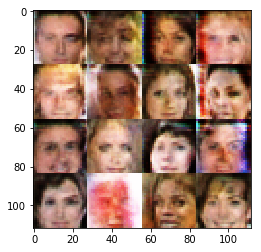

Epoch 1/1... Discriminator Loss: 1.4935... Generator Loss: 0.5184
Epoch 1/1... Discriminator Loss: 1.4077... Generator Loss: 0.7060
Epoch 1/1... Discriminator Loss: 1.4391... Generator Loss: 0.5477
Epoch 1/1... Discriminator Loss: 1.6982... Generator Loss: 0.2728
Epoch 1/1... Discriminator Loss: 1.2822... Generator Loss: 0.6654


In [17]:
batch_size = 50
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.